In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 실습 환경 구축

In [ ]:
cd /content/drive/MyDrive/DL/AtoZ/data

/content/drive/MyDrive/DL/AtoZ/data


In [ ]:
# !wget https://www.aitex.es/wp-content/uploads/2019/07/Defect_images.7z

--2022-02-12 07:05:58--  https://www.aitex.es/wp-content/uploads/2019/07/Defect_images.7z
Resolving www.aitex.es (www.aitex.es)... 154.56.134.196
Connecting to www.aitex.es (www.aitex.es)|154.56.134.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77676758 (74M)
Saving to: ‘Defect_images.7z’

Defect_images.7z    100%[===================>]  74.08M  10.1MB/s    in 8.9s    

2022-02-12 07:06:09 (8.37 MB/s) - ‘Defect_images.7z’ saved [77676758/77676758]



In [ ]:
# !wget https://www.aitex.es/wp-content/uploads/2019/07/NODefect_images.7z

--2022-02-12 07:07:03--  https://www.aitex.es/wp-content/uploads/2019/07/NODefect_images.7z
Resolving www.aitex.es (www.aitex.es)... 154.56.134.196
Connecting to www.aitex.es (www.aitex.es)|154.56.134.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98321827 (94M)
Saving to: ‘NODefect_images.7z’

NODefect_images.7z  100%[===================>]  93.77M  10.1MB/s    in 11s     

2022-02-12 07:07:15 (8.69 MB/s) - ‘NODefect_images.7z’ saved [98321827/98321827]



In [ ]:
# !wget https://www.aitex.es/wp-content/uploads/2019/07/Mask_images.7z

--2022-02-12 07:07:23--  https://www.aitex.es/wp-content/uploads/2019/07/Mask_images.7z
Resolving www.aitex.es (www.aitex.es)... 154.56.134.196
Connecting to www.aitex.es (www.aitex.es)|154.56.134.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88311 (86K)
Saving to: ‘Mask_images.7z’

Mask_images.7z      100%[===================>]  86.24K   184KB/s    in 0.5s    

2022-02-12 07:07:25 (184 KB/s) - ‘Mask_images.7z’ saved [88311/88311]



In [ ]:
!ls /content/drive/MyDrive/DL/AtoZ/data

1  2  3  Defect_images	input_data  Mask_images  NODefect_images  output_csv


In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-com

In [ ]:
# !p7zip -d Defect_images.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77676758 bytes (75 MiB)

Extracting archive: Defect_images.7z
--
Path = Defect_images.7z
Type = 7z
Physical Size = 77676758
Headers Size = 1620
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     26% 24 - Defect_images/0027_019_02.png                                        48% 44 - Defect_images/0047_019_04.png                                        67% 67 - Defect_images/0070_023_02.png                                        70% 73 - Defect_images/0076_030_03.png

In [ ]:
# !p7zip -d Mask_images.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 88311 bytes (87 KiB)

Extracting archive: Mask_images.7z
--
Path = Mask_images.7z
Type = 7z
Physical Size = 88311
Headers Size = 1496
Method = LZMA2:18
Solid = +
Blocks = 1

  0%      0% 34 - Mask_images/0037_019_02_mask.png                                            0% 68 - Mask_images/0070_023_02_mask.png                                            0% 100 - Mask_images/0102_010_03_mask.png                                           Everything is Ok

Folde

In [ ]:
# !p7zip -d NODefect_images.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 98321827 bytes (94 MiB)

Extracting archive: NODefect_images.7z
--
Path = NODefect_images.7z
Type = 7z
Physical Size = 98321827
Headers Size = 1749
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     17% 27 - NODefect_images/2306881-210020u/0020_000_05.png                                                          33% 46 - NODefect_images/2306894-210033u/0019_000_02.png                                                          42% 56 - NODefect_images/2311517-195063u/0009_000_04.png

In [ ]:
import cv2
import os
import glob
import shutil
import random
import string
import numpy as np

In [ ]:
PATH_DEFECT = '/content/drive/MyDrive/DL/AtoZ/data/Defect_images/'
PATH_MASK = '/content/drive/MyDrive/DL/AtoZ/data/Mask_images/'
PATH_NODEFECT = '/content/drive/MyDrive/DL/AtoZ/data/NODefect_images/'

## Dataset 불러오기

In [ ]:
random.seed(0)

defect_list = glob.glob(PATH_DEFECT + '*.png')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

In [ ]:
# Match defect-mask pairs

new_defect_list = []
new_mask_list = []

for defect in defect_list:
  num = defect.split('/')[-1].split('_')[0]
  for mask in mask_list:
    num_mask = mask.split('/')[-1].split('_')[0]

    if num == num_mask:
      new_defect_list.append(defect)
      new_mask_list.append(mask)

In [ ]:
defect_list = new_defect_list
mask_list = new_mask_list

## 첫 발송 데이터 생성

In [ ]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/1') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/1')

for file_name in pass_list + defect_list:
  if random.randint(0, 9) < 2:
    barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
    shutil.copy2(file_name, '/content/drive/MyDrive/DL/AtoZ/data/1/' + barcode + '.png')

## 두 번째 데이터 생성

In [ ]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/2') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/2')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/2/OK') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/2/OK')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/2/FAIL') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/2/FAIL')

idx = 0
for file_name in pass_list:
  img = cv2.imread(file_name)
  height, width, _ = img.shape
  step = height // 2

  for i in range(width // step):
    w = i * step
    if (w < width - height) and (random.randint(0, 9) < 2):
      patch = img[:, w:w+height, :]
      cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/2/OK/%04d.png' % idx, patch)
      idx += 1

patch_list = []
for item in zip(defect_list, mask_list):
  defect, mask = item

  img_d = cv2.imread(defect)
  img_m = cv2.imread(mask)

  height, width, _ = img_d.shape
  step = height // 2
  
  for i in range(width // step):
    w = i * step
    if w < width - height:
      patch = img_d[:, w:w+height, :]
      patch_d = img_m[:, w:w+height, :]
      if patch_d.sum() > 0:
        patch_list.append(patch)

random.shuffle(patch_list)
patch_list_fraction = patch_list[:len(patch_list)//3]
for idx, patch in enumerate(patch_list_fraction):
  cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/2/FAIL/%04d.png' % idx, patch)

## 세 번째 데이터 생성

In [ ]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/3') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/3')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/3/OK') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/3/OK')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/3/FAIL') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/3/FAIL')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/3/MASK') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/3/MASK')

idx = 0
for file_name in pass_list:
  img = cv2.imread(file_name)
  height, width, _ = img.shape
  step = height // 2

  for i in range(width // step):
    w = i * step
    if (w < width - height) and (random.randint(0, 9) < 3):
      patch = img[:, w:w+height, :]
      cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/3/OK/%04d.png' % idx, patch)
      idx += 1

patch_pair_list = []
for item in zip(defect_list, mask_list):
  defect, mask = item

  img_d = cv2.imread(defect)
  img_m = cv2.imread(mask)

  height, width, _ = img_d.shape
  step = height // 2
  
  for i in range(width // step):
    w = i * step
    if w < width - height:
      patch = img_d[:, w:w+height, :]
      patch_d = img_m[:, w:w+height, :]
      if patch_d.sum() > 0:
        patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
  patch, patch_d = pair
  cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/3/FAIL/%04d.png' % idx, patch)
  cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/3/MASK/%04d.png' % idx, patch_d)

## 테스트 데이터 생성

In [ ]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/input_data') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/input_data')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/output_csv') is False:
  os.mkdir('/content/drive/MyDrive/DL/AtoZ/data/output_csv')


idx = 0
for file_name in pass_list:
  img = cv2.imread(file_name)
  height, width, _ = img.shape
  step = height // 2

  for i in range(width // step):
    w = i * step
    if (w < width - height) and (random.randint(0, 9) < 5):
      patch = img[:, w:w+height, :]
      cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/input_data/ok_%04d.png' % idx, patch)
      idx += 1

patch_pair_list = []
for item in zip(defect_list, mask_list):
  defect, mask = item

  img_d = cv2.imread(defect)
  img_m = cv2.imread(mask)

  height, width, _ = img_d.shape
  step = height // 2
  
  for i in range(width // step):
    w = i * step
    if w < width - height:
      patch = img_d[:, w:w+height, :]
      patch_d = img_m[:, w:w+height, :]
      if patch_d.sum() > 0:
        patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
  patch, patch_d = pair
  cv2.imwrite('/content/drive/MyDrive/DL/AtoZ/data/input_data/fail_%04d.png' % idx, patch)

# 실행 가능성 확인

## 하이퍼파라미터

In [ ]:
EPOCHS = 50

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/DL/AtoZ/data/2/'
DATASET_OK_PATTERN = DATASET_PATH + 'OK/*.png'
DATASET_FAIL_PATTERN = DATASET_PATH + 'FAIL/*.png'

RESULT_SAVE_PATH = '/content/drive/MyDrive/DL/AtoZ/data/results/'

## 단순한 모델 설정

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
def model():
    return Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)), #tensorflow 버전업으로 코드 변경
                       MaxPool2D(),
                       Conv2D(64, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(128, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(256, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')])

## 데이터셋 불러오기

In [ ]:
def preprocess(file_name):
  img = tf.io.read_file(file_name)
  img = tf.image.decode_png(img)
  return tf.image.convert_image_dtype(img, tf.float32)

In [ ]:
ok_list = glob.glob(DATASET_OK_PATTERN)
ds_ok = tf.data.Dataset.list_files(ok_list)
ds_ok_label = tf.data.Dataset.from_tensor_slices([0] * len(ok_list))

ds_ok = ds_ok.map(preprocess)
ds_ok = tf.data.Dataset.zip((ds_ok, ds_ok_label))

In [ ]:
fail_list = glob.glob(DATASET_FAIL_PATTERN)
ds_fail = tf.data.Dataset.list_files(fail_list)
ds_fail_label = tf.data.Dataset.from_tensor_slices([1] * len(fail_list))

ds_fail = ds_fail.map(preprocess)
ds_fail = tf.data.Dataset.zip((ds_fail, ds_fail_label))

In [ ]:
ds = tf.data.Dataset.concatenate(ds_ok, ds_fail)

## Train, Valid 데이터셋 분할

In [ ]:
ds_size = len(ok_list) + len(fail_list)
train_size = int(ds_size * 0.7)

ds = ds.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).batch(32)
ds_valid = ds.skip(train_size).batch(32)

## 모델 생성 및 학습

In [ ]:
model = model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(ds_train, validation_data=ds_valid, epochs=EPOCHS)

# TFRecord Buidler

## Paths and Hyperparameters

In [ ]:
DATASET_OK_PATTERN = '/content/drive/MyDrive/DL/AtoZ/data/3/OK/*.png'
DATASET_FAIL_PATTERN = '/content/drive/MyDrive/DL/AtoZ/data/3/FAIL/*.png'

TFRECORD_PATH = '/content/drive/MyDrive/DL/AtoZ/tfrecords/'
IMAGE_PER_TFRECORD = 100

## Import data

In [ ]:
ok_list = glob.glob(DATASET_OK_PATTERN)
fail_list = glob.glob(DATASET_FAIL_PATTERN)

num_ok = len(ok_list)
num_fail = len(fail_list)

In [ ]:
# oversamplling

fail_list_new = []
for _ in range(num_ok // num_fail):
  fail_list_new += fail_list
fail_list_new += fail_list[: num_ok % num_fail]
fail_list = fail_list_new

ok_label = [0] * len(ok_list)
fail_label = [1] * len(fail_list)

file_list = ok_list + fail_list
label_list = ok_label + fail_label

## TFRecord functions

In [ ]:
def _bytes_feature(value):
  """Returns a bytes_list fraom a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy()
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / unit."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
  image_shape = tf.image.decode_image(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }
  return tf.train.Example(features=tf.train.Features(feature=feature))

## Write TFRecords

In [ ]:
if os.path.exists(TFRECORD_PATH) is False:
  os.mkdir(TFRECORD_PATH)

num_tfrecords = len(file_list) // IMAGE_PER_TFRECORD
if len(file_list) % IMAGE_PER_TFRECORD != 0:
  num_tfrecords += 1

for idx in range(num_tfrecords):
  idx0 = idx * IMAGE_PER_TFRECORD
  idx1 = idx0 + IMAGE_PER_TFRECORD
  record_file = TFRECORD_PATH + '%05d.tfrecords' % idx

  with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in zip(file_list[idx0:idx1], label_list[idx0:idx1]):
      image_string = open(filename, 'rb').read()
      tf_example = image_example(image_string, label)
      writer.write(tf_example.SerializeToString())

## Data 전처리 함수

In [ ]:
def preprocess(img):
  return tf.image.convert_image_dtype(img, tf.float32)

## Data Augmentation 함수

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
def augmentation(img, label):
  def flip(x):
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)
    return x

  def rotate(x):
    x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                lambda: tfa.image.rotate(x, 
                                         tf.random.uniform(shape=[], minval=0.0, maxval=360.0, dtype=tf.float32),
                                         interpolation='BILINEAR'),
                lambda: x)
    return x

  def translation(x):
    dx = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
    dy = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
    x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                lambda: tfa.image.transform(x, 
                                            [0, 0, dx, 0, 0, dy, 0, 0],
                                            interpolation='BILINEAR'),
                lambda: x)
    return x

  img = flip(img)
  img = rotate(img)
  img = translation(img)

  return img, label

## TFRecords 불러오기

In [ ]:
tffiles = glob.glob('/content/drive/MyDrive/DL/AtoZ/tfrecords/*')
raw_image_dataset = tf.data.TFRecordDataset(tffiles)

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

In [ ]:
def _parse_image_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

In [ ]:
def _parse_image_label(parsed_dataset):
  return preprocess(tf.image.decode_png(parsed_dataset['image_raw'])), parsed_dataset['label']

In [ ]:
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
dataset = parsed_image_dataset.map(_parse_image_label)

## 데이터셋 나누기

In [ ]:
ds_size = 0
for _ in dataset:
  ds_size += 1

train_size = int(ds_size * 0.7)

ds = dataset.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).prefetch(1024).batch(32).map(augmentation)
ds_valid = ds.skip(train_size).prefetch(1024).batch(32)

## Inception-based 모델

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Concatenate, Flatten, Dense

In [ ]:
def Model():
  def inception(filters):
    def subnetwork(x):
      h1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
      h1 = MaxPool2D()(h1)

      h2 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
      h2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(h2)
      h2 = MaxPool2D()(h2)

      h3 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
      h3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(h3)
      h3 = MaxPool2D()(h3)

      return Concatenate()([h1, h2, h3])
    return subnetwork

  x = tf.keras.Input(shape=(256, 256, 3))
  h = inception(16)(x)
  h = inception(32)(h)
  h = inception(32)(h)
  h = inception(32)(h)
  h = inception(32)(h)
  h = Flatten()(h)
  h = Dense(1024, activation='relu')(h)
  y = Dense(1, activation='sigmoid')(h)
  return tf.keras.Model(inputs=x, outputs=y)

## 모델 학습

In [ ]:
EPOCHS = 1000
RESULT_SAVE_PATH = '/content/drive/MyDrive/DL/AtoZ/data/results/'

In [ ]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=EPOCHS,
                    callbacks=[earlystopping])

Epoch 1/1000
55/55 [==============================] - 25s 338ms/step - loss: 0.7054 - accuracy: 0.5434 - val_loss: 0.6895 - val_accuracy: 0.5100
Epoch 2/1000
55/55 [==============================] - 22s 334ms/step - loss: 0.6849 - accuracy: 0.5250 - val_loss: 0.6468 - val_accuracy: 0.6439
Epoch 3/1000
55/55 [==============================] - 24s 356ms/step - loss: 0.6865 - accuracy: 0.5405 - val_loss: 0.6552 - val_accuracy: 0.6399
Epoch 4/1000
55/55 [==============================] - 24s 361ms/step - loss: 0.6809 - accuracy: 0.5261 - val_loss: 0.6323 - val_accuracy: 0.6921
Epoch 5/1000
55/55 [==============================] - 21s 317ms/step - loss: 0.6578 - accuracy: 0.5715 - val_loss: 0.6054 - val_accuracy: 0.6506
Epoch 6/1000
55/55 [==============================] - 21s 316ms/step - loss: 0.6688 - accuracy: 0.5715 - val_loss: 0.6528 - val_accuracy: 0.6466
Epoch 7/1000
55/55 [==============================] - 22s 338ms/step - loss: 0.6777 - accuracy: 0.5646 - val_loss: 0.6259 - val_ac

In [ ]:
import matplotlib.pyplot as plt

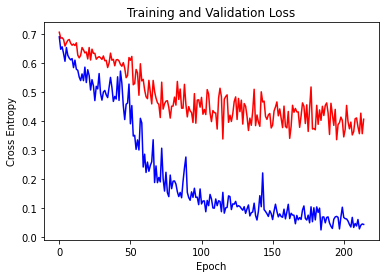

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'r')
plt.plot(val_loss, 'b')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

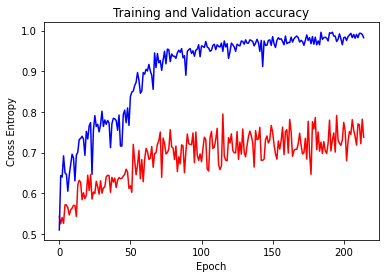

In [ ]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

plt.figure()
plt.plot(loss, 'r')
plt.plot(val_loss, 'b')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation accuracy')
plt.show()

## 모델 저장

In [ ]:
model.save('/content/drive/MyDrive/DL/AtoZ/data/model/inception_model.h5')

# 배치형 동작 프로그램

In [2]:
from datetime import datetime
import time
import glob

## 하이퍼파라미터, path

In [19]:
THRES_LEVEL = 0.5

INPUT_PATH = '/content/drive/MyDrive/DL/AtoZ/data/input_data/'
CSV_PATH = '/content/drive/MyDrive/DL/AtoZ/data/output_csv/'

## 모델 불러오기

In [20]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DL/AtoZ/data/model/inception_model.h5')

## 입력 데이터 전처리

In [4]:
def preprocess(file_name):
  img = tf.io.read_file(file_name)
  img = tf.image.decode_image(img)
  return tf.image.convert_image_dtype(img, tf.float32)

## 입력 데이터 불러오기

In [21]:
file_list = glob.glob(INPUT_PATH + '*.png')
dataset = tf.data.Dataset.list_files(file_list).map(preprocess)

## 알고리즘 구동 및 CSV 결과 저장

In [23]:
now = datetime.now().strftime('%Y%m%d_%H%M%S')
with open(CSV_PATH + now + '.csv', 'w') as f:
  for image, filename in zip(dataset, file_list):
    image = image[tf.newaxis, ...] # HWC -> NHWC

    a = time.time()
    predict = model.predict(image)[0][0]
    print('Inference Time:', time.time() - a)

    if predict > THRES_LEVEL:
      label = 'FAIL'
    else:
      label = 'OK'

      f.write(','.join([filename, label, str(predict)]) + '\n')

Inference Time: 0.1517951488494873
Inference Time: 0.11864256858825684
Inference Time: 0.12227535247802734
Inference Time: 0.16329574584960938
Inference Time: 0.17540788650512695
Inference Time: 0.22026991844177246
Inference Time: 0.1851944923400879
Inference Time: 0.21341943740844727
Inference Time: 0.15885519981384277
Inference Time: 0.12405896186828613
Inference Time: 0.0763392448425293
Inference Time: 0.08213305473327637
Inference Time: 0.06605982780456543
Inference Time: 0.07895898818969727
Inference Time: 0.06785869598388672
Inference Time: 0.08290839195251465
Inference Time: 0.06804776191711426
Inference Time: 0.07228851318359375
Inference Time: 0.08052921295166016
Inference Time: 0.18880462646484375
Inference Time: 0.13436555862426758
Inference Time: 0.21103954315185547
Inference Time: 0.13940715789794922
Inference Time: 0.16465210914611816
Inference Time: 0.24555683135986328
Inference Time: 0.1147146224975586
Inference Time: 0.08641743659973145
Inference Time: 0.27316188812255